# MEDICIONES SOBRE TIERRA 15/07

## Cargamos paquetes y funciones que usaremos después ##

In [22]:
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftfreq, fftshift
#from scipy import stats

from matplotlib import pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter

import os

In [23]:
#%run to_baseband.ipynb
%run FFT_ordenada.ipynb
#%run to_dB.ipynb
%run mv_to_ep.ipynb
%run R_Fresnel.ipynb
#%run skin_depth.ipynb
%run check_import.ipynb

In [24]:
## Parámetros globales de la antena

Fs = 23.328e9 #Frecuencia de muestreo [Hz] 
Ts = 1/Fs
BW = 1.5e9 

portadora = 'Fc8/'

In [25]:
if portadora== 'Fc7/':
    fc = 7.290e9 # frecuencia portadora
    Fc = '7.29GHz'
elif portadora== 'Fc8/':
    fc = 8.748e9
    Fc = '8.74GHz'
else:
    print('Error: portadora debe ser Fc7 o Fc8')

corte = 150
Nfft= 1024 # nro de frecs -> conviene que sea multiplo de 2 para calcular la FFT de manera eficiente. 
#Tiene que ser mayor a la longitud de la señal (285 para 2m, 439 para 3m)

In [26]:
## Selecciono la altura de la antena 

alturas = ['1/','2/','3/','4/']

##_____________MODIFICAR_______________##
D = ['35.3cm','46.7cm','cm','30cm']
h = (0.353, 0.467, 0.65, 0.30)
##_____________________________________##



#elegir etre 0 y 3
NUMERO = 3

altura = alturas[NUMERO]
D = D[NUMERO]
h = h[NUMERO]

## Analizo la señales

In [27]:
##----------------IMPORTO LAS SEÑALES----------------------------##

sistema = 'windows'
target1 = 'S1'
target2 = 'S2'

if sistema == 'ubuntu':
    ##----Ubuntu----##
    ##codigo para gordo tony

    path = '/home/gordotony/Documents/UWB/tesis/mediciones_15_07'
    #path = '/home/gordotony/Documents/UWB/tesis/mediciones_09_06/'

    Scal = check_import_ub(path,portadora,altura,target1)
    print(np.shape(Scal))

    # Star = check_import_ub(path,portadora,altura,target2)
    # print(np.shape(Star))

    
elif sistema == 'windows': 
    ##----Windows----##
    #codigo para coraline#

    path = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_15_07'
    #path = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_09_06'

    Scal = check_import_win(path,portadora,altura,target1)
    print('Scal =', np.shape(Scal))
    print()

    # Star = check_import_win(path,portadora,altura,target2)
    # print('Star =',np.shape(Star))
    # print()

    
else:
    print('elegir sistema operativo')


# mediciones = 5

medición  S1  #0 = 441
medición  S1  #1 = 441
medición  S1  #2 = 441
medición  S1  #3 = 441
medición  S1  #4 = 441

iguales, importo datos!!
Scal = (5, 440, 11)



dim. S1_avg = (440,)


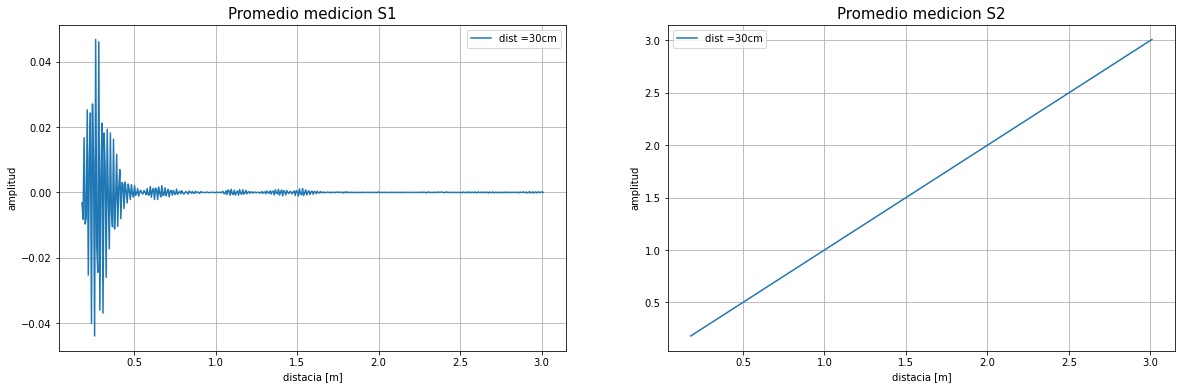

In [30]:
##----------------PROCESO LAS SEÑALES----------------------------##
dist = Scal[0,:,0]
Scal_avg  = np.mean(Scal[0:,:,1:],axis=(0,2))
print('dim. S1_avg =', np.shape(Scal_avg))

# Star_avg  = np.mean(Star[0:,:,1:],axis=(0,2))
# print('dim. S2_avg =', np.shape(Star_avg))

fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

ax[0].plot(dist, Scal_avg, label='dist ='+D)
ax[0].grid('on')
ax[0].set_xlabel('distacia [m]')
ax[0].set_ylabel('amplitud')
ax[0].set_title('Promedio medicion S1', fontsize = 15)
ax[0].legend(loc="best")

ax[1].plot(dist, dist, label='dist ='+D)
ax[1].grid('on')
ax[1].set_xlabel('distacia [m]')
ax[1].set_ylabel('amplitud')
ax[1].set_title('Promedio medicion S2', fontsize = 15)
ax[1].legend(loc="best")



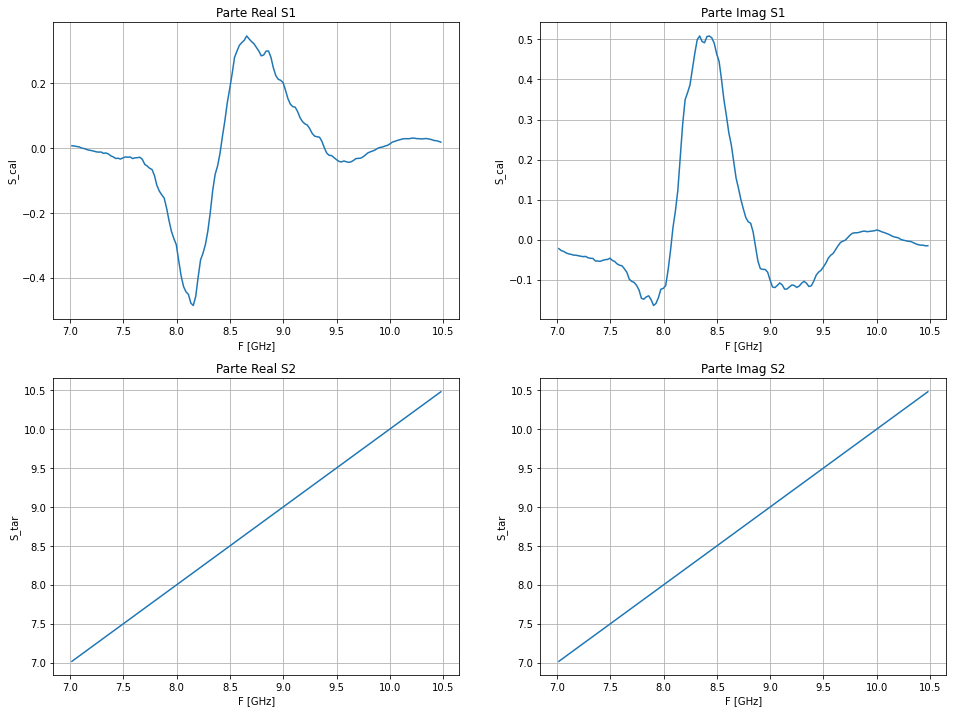

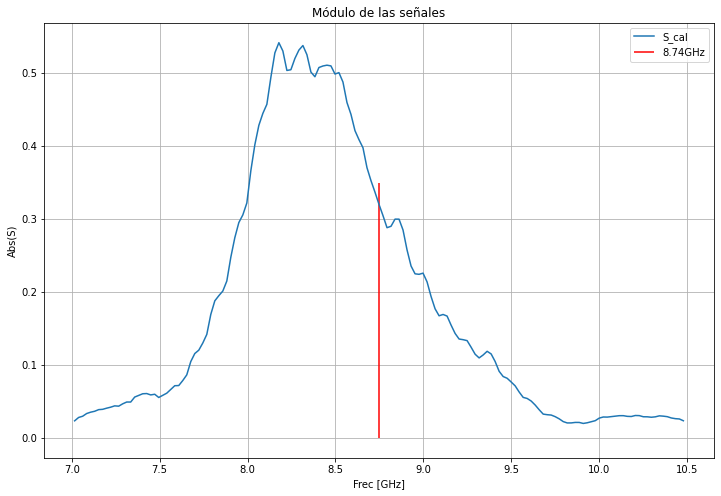

In [34]:
## Transformo Fourier
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Deltaf = 1.75e9
f_min = fc-Deltaf
f_max = fc+Deltaf
#f_min, f_max = 6.5e9, 11e9

frec_fft = FFT_ordenada(Scal_avg,Nfft,Ts)[0]

f_pos = frec_fft[(frec_fft>f_min) & (frec_fft<f_max)]
n_frecs = len(f_pos)
start = int(np.min(np.where(frec_fft>f_min)))
end = int(np.max(np.where(frec_fft<f_max))+1)
f_norm = f_pos/1e9 # frec >0 normalizada en GHz
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

S1_fft = np.zeros(Nfft,dtype=complex)
# S2_fft = np.zeros(Nfft,dtype=complex)

Scal_fft = FFT_ordenada(Scal_avg,Nfft,Ts)[1]
# Star_fft = FFT_ordenada(Star_avg,Nfft,Ts)[1]

Scal_fpos = Scal_fft[start:end]
# Star_fpos = Star_fft[start:end]

## Grafico
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

ax[0,0].plot(f_norm,np.real(Scal_fpos))
ax[0,0].grid('on')
ax[0,0].set_xlabel('F [GHz]')
ax[0,0].set_ylabel('S_cal')   
ax[0,0].set_title('Parte Real S1')

ax[0,1].plot(f_norm,np.imag(Scal_fpos))
ax[0,1].grid('on')
ax[0,1].set_xlabel('F [GHz]')
ax[0,1].set_ylabel('S_cal')
ax[0,1].set_title('Parte Imag S1')

# ax[1,0].plot(f_norm,np.real(Star_fpos))
ax[1,0].plot(f_norm,f_norm)
ax[1,0].grid('on')
ax[1,0].set_xlabel('F [GHz]')
ax[1,0].set_ylabel('S_tar')   
ax[1,0].set_title('Parte Real S2')

# ax[1,1].plot(f_norm,np.imag(Star_fpos))
ax[1,1].plot(f_norm,f_norm)
ax[1,1].grid('on')
ax[1,1].set_xlabel('F [GHz]')
ax[1,1].set_ylabel('S_tar')
ax[1,1].set_title('Parte Imag S2')

plt.figure(figsize=(12,8))
plt.plot(f_norm,np.abs(Scal_fpos),label = "S_cal")
# plt.plot(f_norm,np.abs(Star_fpos),label = "S_tar")
plt.vlines(fc/1e9,0,0.35,colors='red',label = Fc)
plt.grid()
plt.xlabel('Frec [GHz]')
plt.ylabel('Abs(S)')
plt.legend(loc="best")
plt.title('Módulo de las señales')
plt.show()

## Ajuste de las mediciones

### Valores del hydra

In [ ]:
depth = () #profundidad (m)
mv_med = ()
ep_med = ()
sigma = ()

Text(0.5, 1.0, 'conductividad')

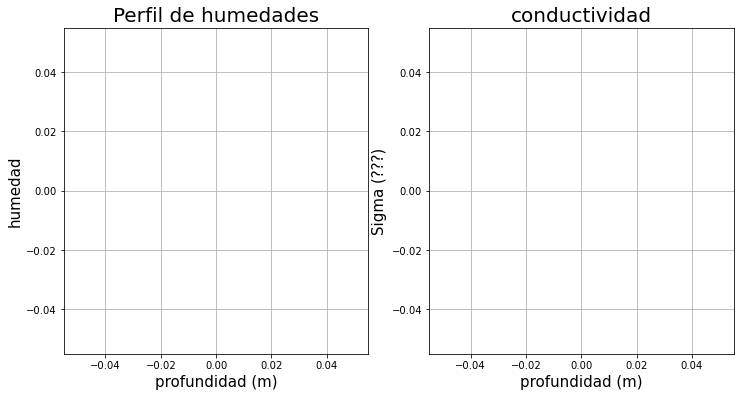

In [ ]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

#perfil de humedades
ax[0].plot(depth, mv_med,'o-')
ax[0].grid('on')
ax[0].set_xlabel("profundidad (m)", fontsize=15)
ax[0].set_ylabel("humedad", fontsize=15)
ax[0].set_title("Perfil de humedades", fontsize=20)

#sigmas
ax[1].plot(depth, sigma,'o-')
ax[1].grid('on')
ax[1].set_xlabel("profundidad (m)", fontsize=15)
ax[1].set_ylabel("Sigma (???)", fontsize=15)
ax[1].set_title("conductividad", fontsize=20)


### Evaluacion de $\epsilon$
Definiendo $\epsilon_{med}=\epsilon'-i\epsilon''$ donde $\epsilon''=\frac{\sigma}{\omega\epsilon_0}$ 

si 
\begin{cases}
    \frac{\epsilon''}{\epsilon'}<10^{-2}\;\;\text{dieléctrico con baja pérdida}\\
    10^{-2}<\frac{\epsilon''}{\epsilon'}<10^2\;\;\text{quasi-conductor}\\
    10^2<\frac{\epsilon''}{\epsilon'}\;\;\text{buen conductor}\\
\end{cases}

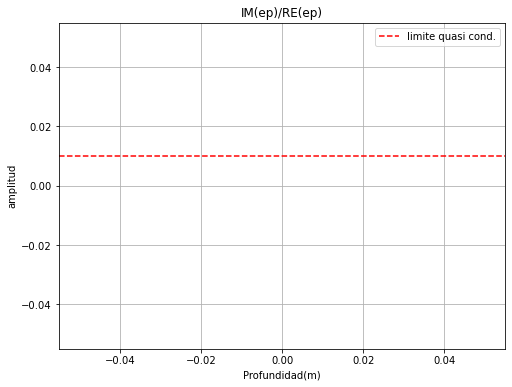

In [ ]:
#Evaluo el tipo de conductor al que se parece la tierra
plt.figure(figsize=(8,6))
plt.plot(depth[1:], np.imag(ep_med[1:])/np.real(ep_med[1:]),'o-')
plt.axhline(y=1e-2, color='r', linestyle='--',label='limite quasi cond.')
#plt.axhline(y=1e2, color='r', linestyle='--',label='limite quasi cond.')
plt.grid()
plt.xlabel('Profundidad(m)')
plt.ylabel('amplitud')
plt.legend(loc="best")
plt.title('IM(ep)/RE(ep)')
plt.show()

In [ ]:
#grilla de valores para MV
mv_min = 0.4*np.min(mv_med)
mv_max = 1.25*np.max(mv_med)
n_mv = 100

print(mv_min, mv_max)
MV = np.linspace(mv_min,mv_max,n_mv)

Sand = 0.5
Clay = 0.5

ep_teo = mv_to_ep(MV,Sand,Clay,0)['ep']

#usando el error
#ep_std = 0.01 #std para estimar el error en ep del modelo teórico
#ep_teo = mv_to_ep(MV,Sand,Clay,ep_std)['ep']
#ep_error = mod.mv_to_ep(MV,Sand, Clay,ep_std)['ep_error']

ep_min, ep_max = np.min(ep_teo), np.max(ep_teo)
print('ep min:', ep_min)
print('ep max:', ep_max)


ValueError: zero-size array to reduction operation minimum which has no identity

### Modelo medio semi-infinito

In [ ]:
# vector para guardar las métricas de error
e_mae = np.zeros(n_mv,dtype=float)

#obs: len(ep_teo)=len(MV)=n_mv
for i in range(n_mv):
    ep = ep_teo[i]
    
    #coef de reflexion depende solo de ep
    R = R_1capa(ep)
    S_teo = Scal_fpos*R

    ##error
    e_mae[i] = np.sum(np.abs(np.abs(S_teo)-np.abs(Star_fpos))) /len(S_teo)

ind = np.argmin(e_mae)

mv_op = MV[ind]
ep_op = ep_teo[ind]
S_op = Scal_fpos*R_1capa(ep_op)
error_mae = e_mae[ind]

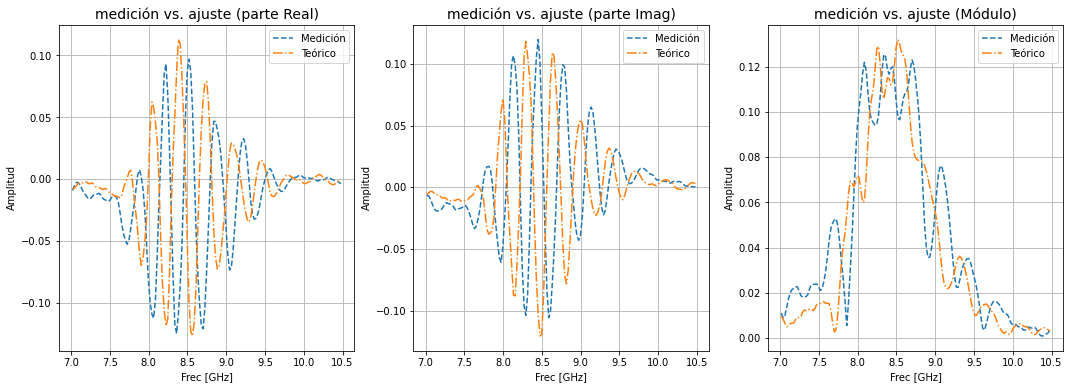

epsilon optimo: (8.7049+2.06226j)
epsilon medido (mas superficial): (11.496+4.028j)

humedad optima: 0.2
humedad medida (mas superficial): 0.19


In [ ]:
fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

ax[0].plot(f_norm,np.real(Star_fpos),'--',label='Medición')
ax[0].plot(f_norm,np.real(S_op),'-.',label='Teórico')
ax[0].grid('on')
ax[0].legend(loc="best",fontsize=10)
ax[0].set_xlabel('Frec [GHz]')
ax[0].set_ylabel('Amplitud')
ax[0].set_title( 'medición vs. ajuste (parte Real)', fontsize=14) #, fontstyle='normal')

ax[1].plot(f_norm,np.imag(Star_fpos),'--',label='Medición')
ax[1].plot(f_norm,np.imag(S_op),'-.',label='Teórico')
ax[1].grid('on')
ax[1].legend(loc="best",fontsize=10)
ax[1].set_xlabel('Frec [GHz]')
ax[1].set_ylabel('Amplitud')
ax[1].set_title( 'medición vs. ajuste (parte Imag)', fontsize=14) #, fontstyle='normal')

ax[2].plot(f_norm,np.abs(Star_fpos),'--',label='Medición')
ax[2].plot(f_norm,np.abs(S_op),'-.',label='Teórico')
ax[2].grid('on')
ax[2].legend(loc="best",fontsize=10)
ax[2].set_xlabel('Frec [GHz]')
ax[2].set_ylabel('Amplitud')
ax[2].set_title( 'medición vs. ajuste (Módulo)', fontsize=14) #, fontstyle='normal')
plt.show()

print('epsilon optimo:', ep_op)
print('epsilon medido (mas superficial):', ep_med[1])
print()
print('humedad optima:', mv_op)
print('humedad medida (mas superficial):', mv_med[1])

## Modelo con 2 capas

In [ ]:
n_ep = 20
ep1Range = np.linspace(ep_min,0.7*ep_max,n_ep)
ep2Range = np.linspace(1.15*ep_min,0.95*ep_max,n_ep)

print('ep1:',ep1Range[0],ep1Range[-1])
print('ep2:',ep2Range[0],ep2Range[-1])

# espesor de la primera capa
d_min, d_max, n_d = 0.018, 0.08, 40
dRange = np.linspace(d_min,d_max,n_d)

print('d:',np.min(dRange),np.max(dRange))

ep1: (2.007-0.198j) (19.77257625+4.317033875j)
ep2: (2.30805-0.22769999999999999j) (26.834210625+5.8588316874999995j)
d: 0.018 0.08


indices optimos (7, 0, 3)


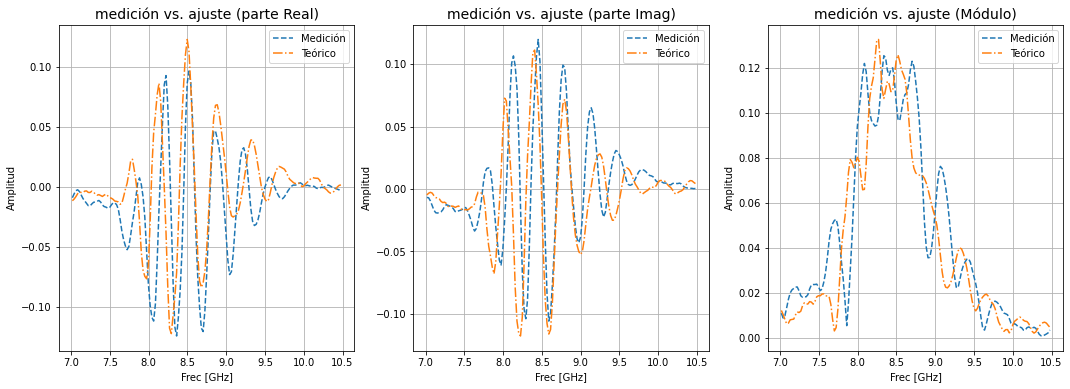

d_opt: 2.913 cm
comparo con las mediciones medidas para depth= 0.025

ep1_opt: 2.007
ep1_medido (2,5cm): (11.496+4.028j)

ep2_opt: 6.181
ep2_medido (7cm): (13.894+5.12j)


In [ ]:
# vector para guardar el error para cada para (EP1,EP2) usado en el ajuste
Errores = np.zeros((n_d,n_ep,n_ep),dtype=float)

# vector en donde guardo la señal teórica que mejor ajusta a cada medición
S_optima = np.zeros(len(Scal_fpos), dtype=complex)

for i0 in range(n_d):
    D = dRange[i0]
    for i1 in range(n_ep):
        EP1 = ep1Range[i1]
        for i2 in range(n_ep):
            EP2 = ep2Range[i2]

            # coef de reflexión con EP1, EP2, D
            R = R_ep1_ep2(EP1,EP2,D,f_pos) # Ref_1capa sólo es válido para frec positivas
            S_teo = Scal_fpos*R #*np.exp(-1j*2*D*2*np.pi*f_pos/3e8)
            
            ## Calculo métricas de error #
            Errores[i0,i1,i2] = np.sum(np.abs(np.abs(S_teo)-np.abs(Star_fpos)))/len(S_teo)  ## error absoluto medio

print('indices optimos', np.unravel_index(Errores.argmin(),Errores.shape))

indice_d_opt = np.unravel_index(Errores.argmin(),Errores.shape)[0]
D_opt = dRange[indice_d_opt]

indice_ep1_opt = np.unravel_index(Errores.argmin(),Errores.shape)[1]
EP1_opt = ep1Range[indice_ep1_opt]

indice_ep2_opt = np.unravel_index(Errores.argmin(),Errores.shape)[2]
EP2_opt = ep2Range[indice_ep2_opt]

# Señal optima:
R_opt = R_ep1_ep2(EP1_opt,EP2_opt,D_opt,f_pos) 
S_opt = Scal_fpos*R_opt #*np.exp(-1j*2*D*2*np.pi*f_pos/3e8)


fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

ax[0].plot(f_norm,np.real(Star_fpos),'--',label='Medición')
ax[0].plot(f_norm,np.real(S_opt),'-.',label='Teórico')
ax[0].grid('on')
ax[0].legend(loc="best",fontsize=10)
ax[0].set_xlabel('Frec [GHz]')
ax[0].set_ylabel('Amplitud')
ax[0].set_title( 'medición vs. ajuste (parte Real)', fontsize=14) #, fontstyle='normal')

ax[1].plot(f_norm,np.imag(Star_fpos),'--',label='Medición')
ax[1].plot(f_norm,np.imag(S_opt),'-.',label='Teórico')
ax[1].grid('on')
ax[1].legend(loc="best",fontsize=10)
ax[1].set_xlabel('Frec [GHz]')
ax[1].set_ylabel('Amplitud')
ax[1].set_title( 'medición vs. ajuste (parte Imag)', fontsize=14) #, fontstyle='normal')

ax[2].plot(f_norm,np.abs(Star_fpos),'--',label='Medición')
ax[2].plot(f_norm,np.abs(S_opt),'-.',label='Teórico')
ax[2].grid('on')
ax[2].legend(loc="best",fontsize=10)
ax[2].set_xlabel('Frec [GHz]')
ax[2].set_ylabel('Amplitud')
ax[2].set_title( 'medición vs. ajuste (Módulo)', fontsize=14) #, fontstyle='normal')
plt.show()

print('d_opt:', str(round(100*D_opt,3))+' cm')
print('comparo con las mediciones medidas para depth=', depth[1])
print()
print('ep1_opt:',round(np.real(EP1_opt),3))
print('ep1_medido (2,5cm):', ep_med[1])
print()
print('ep2_opt:',round(np.real(EP2_opt),3))
print('ep2_medido (7cm):',ep_med[2])